# IMPORTING REQUIRED LIBRARIES FOR EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# READING THE DATASET

In [2]:
# importing the dataset using pandas library:-
data = pd.read_csv(r"C:\Users\abhin\Desktop\python\practice files\loan_prediction.csv")

In [3]:
# viewing the dataset:-
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORING THE DATASET
1) In total we have 13 columns out of which 12 columns are independent variables and [Loan_status] is dependent variable.
2) the column named ['Dependents'] has wrong data type so we will need to convert it's data type from object to integer(float or int)

In [4]:
data.columns 

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# getting the info about the data types of the columns in the dataset:-
# Also there are null values in many columns which we will impute with appropriate values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


# CREATING NEW ATTRIBUTE AS TotalIncome

In [6]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


# PRE-PROCESSING DATA:- CHECKING NULL VALUES
1) the column Credit_History has most number of null values.

In [7]:
# checking for null values in the dataset:-
df_null = pd.DataFrame(data.isnull().sum().sort_values(ascending=False),columns=['NULL_COUNT'])
df_null['% NULL_COUNT'] = np.round((data.isnull().sum()/len(data)*100),2).sort_values(ascending=False)
df_null

,NULL_COUNT,% NULL_COUNT
Credit_History,50,8.14
Self_Employed,32,5.21
LoanAmount,22,3.58
Dependents,15,2.44
Loan_Amount_Term,14,2.28
Gender,13,2.12
Married,3,0.49
Loan_ID,0,0.00
Education,0,0.00
ApplicantIncome,0,0.00


<Axes: >

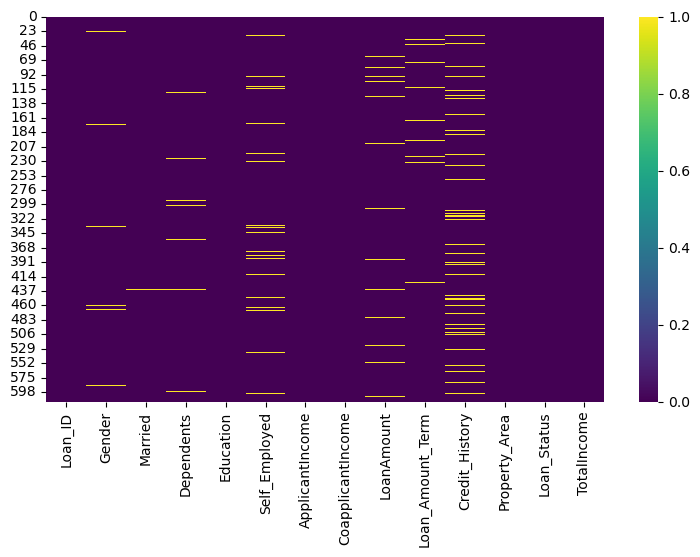

In [8]:
# visualizing the null values using heatmap
plt.subplots(1,1,figsize=(9,5))
sns.heatmap(data.isnull(),cmap='viridis')

# REPLACING VALUES IN [DEPENDENTS] COLUMN AND CHANGING IT'S DATA TYPE

In [9]:
data['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
# replacing values in ['Dependents'] column:-
data['Dependents'] = data['Dependents'].replace('3+','3')
data['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [11]:
# changing the data type of 'Dependents' column:-
data['Dependents'] = pd.to_numeric(data['Dependents'],errors='raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 72.0+ KB


# CHECKING FOR OUTLIERS
ApplicantIncome,CoapplicantIncome,LoanAmount has a lot of outliers.

Text(0.5, 1.0, 'LoanAmount')

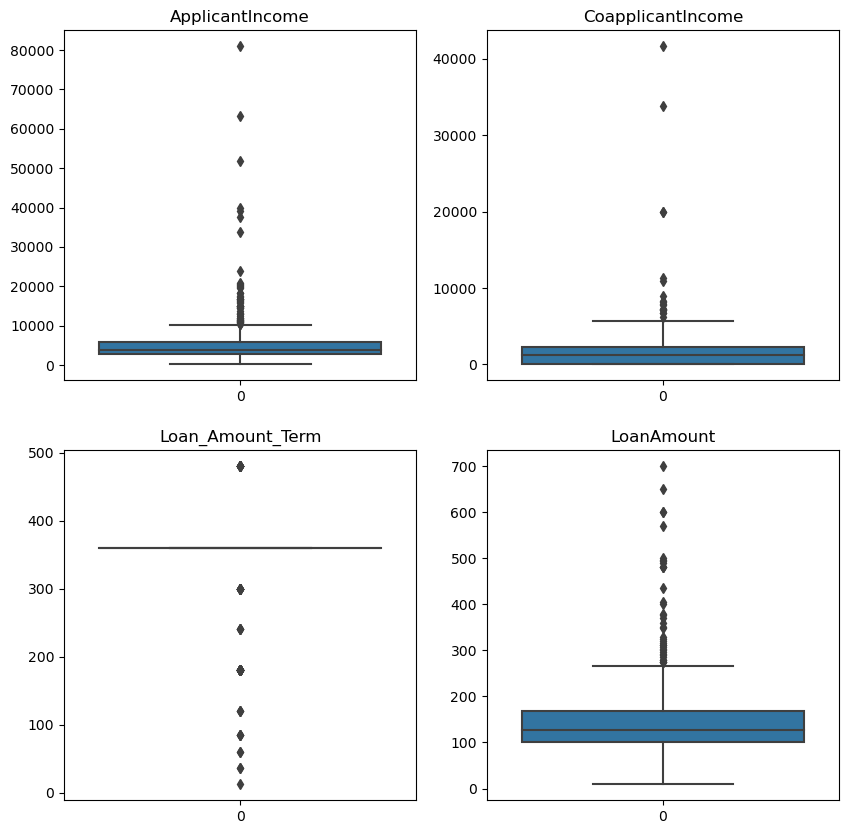

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(data['ApplicantIncome'])
plt.title("ApplicantIncome")

plt.subplot(2,2,2)
sns.boxplot(data['CoapplicantIncome'])
plt.title("CoapplicantIncome")

plt.subplot(2,2,3)
sns.boxplot(data['Loan_Amount_Term'])
plt.title("Loan_Amount_Term")

plt.subplot(2,2,4)
sns.boxplot(data['LoanAmount'])
plt.title("LoanAmount")

# NULL VALUE TREATMENT

In [13]:
# filling the null values in categorical columns i.e ['Gender','Married','Self_Employed'] with mode
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [14]:
# filling the null values in numerical columns i.e ['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']
# for 'Dependents','Credit_History','Loan_Amount_Term' columns we can use mode and for 'LoanAmount' column we can use median
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [15]:
# all null values are treated.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  TotalIncome        614 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 88.1+ KB


# DESCRIPTIVE STATS OF THE DATASET

In [16]:
# getting descriptive stats of the dataset
data.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049,7024.705081
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339,6458.663872
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,4166.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,5416.500000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,7521.750000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,81000.000000


## EDA (EXPLORATORY DATA ANALYSIS)

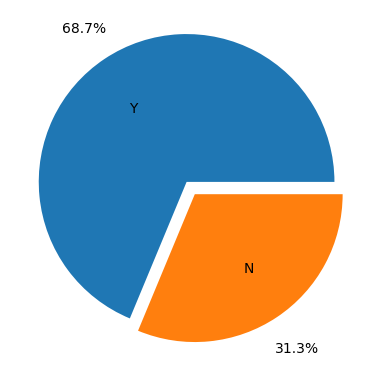

In [17]:
# LET'S HAVE A LOOK AT THE DISTRIBUTION OF LOAN STATUS COLUMN USING PIE CHART:-

loan_status_count = data['Loan_Status'].value_counts()
plt.pie(loan_status_count,labels=loan_status_count.index,autopct='%1.1f%%',pctdistance=1.25, labeldistance=.6,explode = (0.1,0))
plt.show()

Text(0.5, 1.0, 'Gender wise loan applicants')

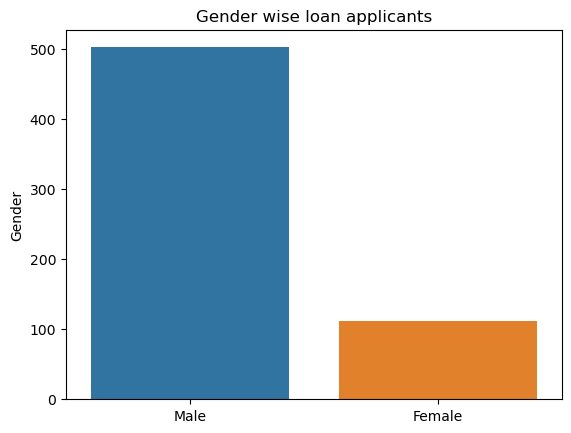

In [18]:
# Distribution of gender column
gender_count = data['Gender'].value_counts()
sns.barplot(data,x=gender_count.index,y=gender_count)
plt.title("Gender wise loan applicants")

Text(0.5, 1.0, 'Marital status wise loan applicants')

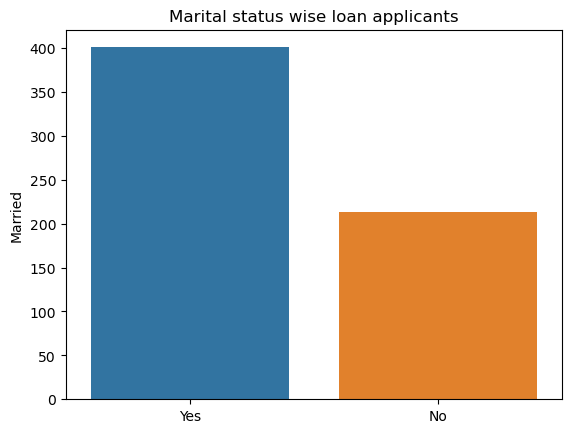

In [19]:
# Distribution of marital status column:-
married_count = data['Married'].value_counts()
sns.barplot(data,x=married_count.index,y=married_count)
plt.title("Marital status wise loan applicants")

Text(0.5, 1.0, 'Education wise loan applicants')

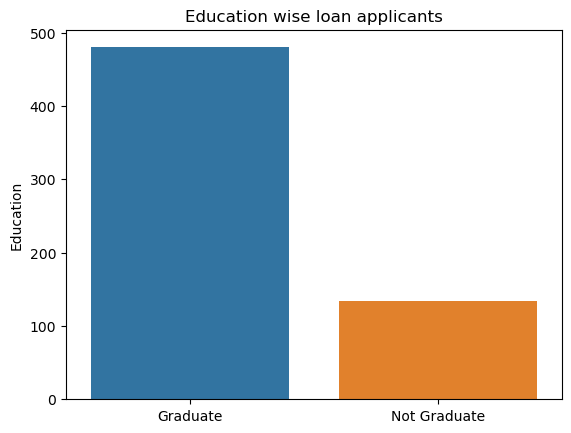

In [20]:
# Distribution of education column:-
education_count = data['Education'].value_counts()
sns.barplot(data,x=education_count.index,y=education_count)
plt.title("Education wise loan applicants")

Text(0.5, 1.0, 'Mode of employment wise loan applicants')

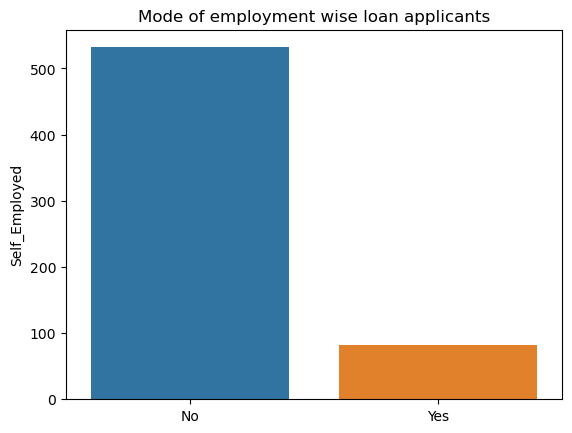

In [21]:
# Distribution of Self_Employed column:-
self_employed_count = data['Self_Employed'].value_counts()
sns.barplot(data,x=self_employed_count.index,y=self_employed_count)
plt.title("Mode of employment wise loan applicants")

# NUMERICAL ATTRIBUTES VISUALIZATION
1) The distributions of ApplicantIncome, CoapplicantIncome, LoanAmount are left skewed.
2) The attribute Loan_Amount_Term has a lot of variance and the range of values is also large.

<Axes: xlabel='TotalIncome', ylabel='Density'>

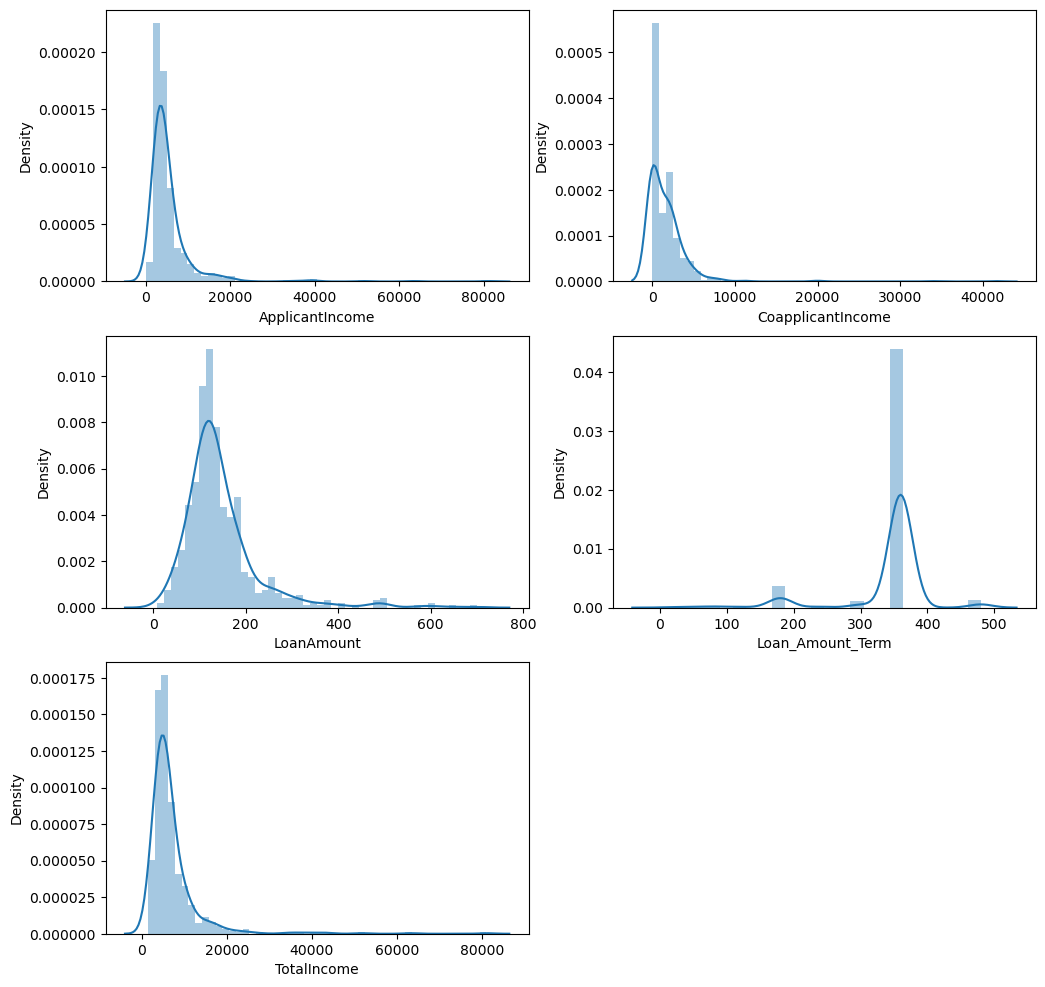

In [22]:
plt.figure(figsize=(12,12))
plt.subplot(3,2,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(3,2,2)
sns.distplot(data['CoapplicantIncome'])

plt.subplot(3,2,3)
sns.distplot(data['LoanAmount'])

plt.subplot(3,2,4)
sns.distplot(data['Loan_Amount_Term'])

plt.subplot(3,2,5)
sns.distplot(data['TotalIncome'])

# APPLYING LOG TRANSFORMATIONS TO THESE ATTRIBUTES

In [23]:
data['ApplicantIncome'] = np.log(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.log(data['CoapplicantIncome'])
data['LoanAmount'] = np.log(data['LoanAmount'])
data['Loan_Amount_Term'] = np.log(data['Loan_Amount_Term'])
data['TotalIncome'] = np.log(data['TotalIncome'])

# CHECKING THE DISTRIBUTION AFTER TRANSFORMATIONS

<Axes: xlabel='TotalIncome', ylabel='Density'>

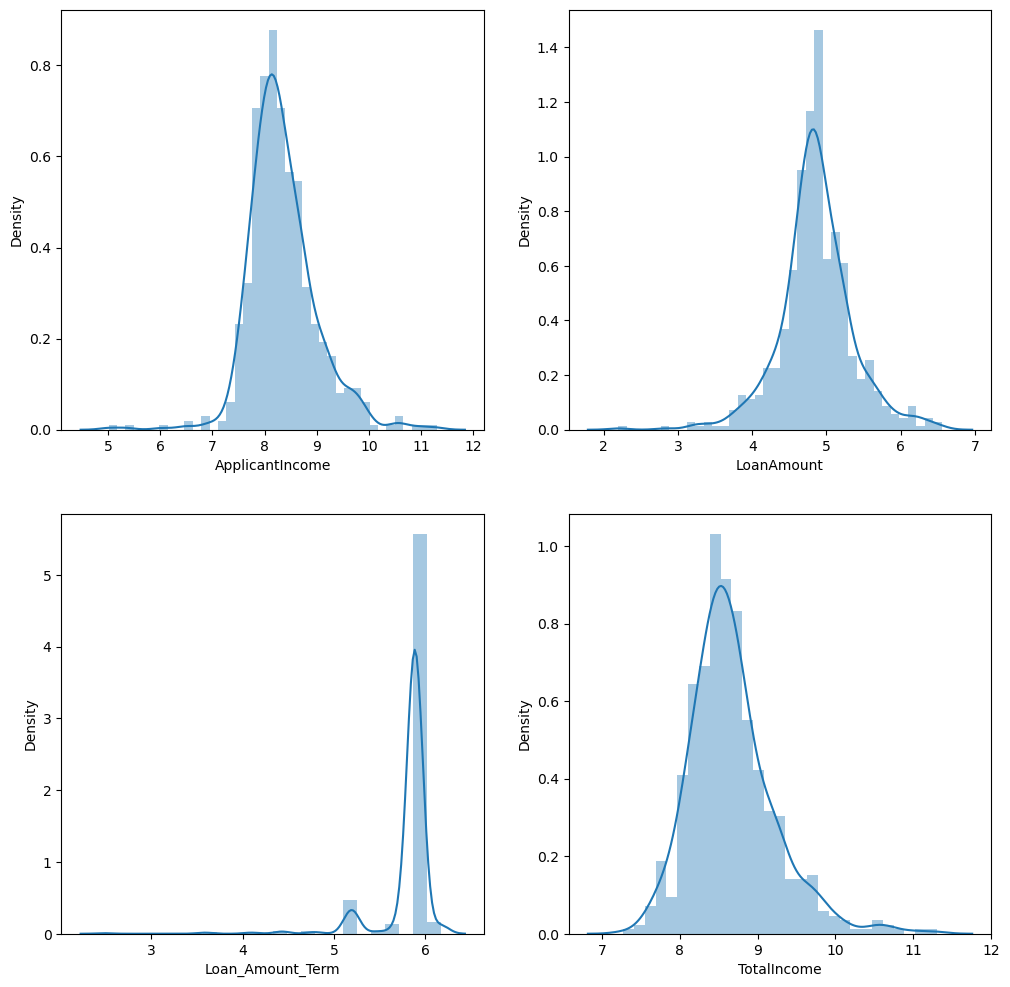

In [24]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(2,2,2)
sns.distplot(data['LoanAmount'])

plt.subplot(2,2,3)
sns.distplot(data['Loan_Amount_Term'])

plt.subplot(2,2,4)
sns.distplot(data['TotalIncome'])

# CORRELATION MATRIX

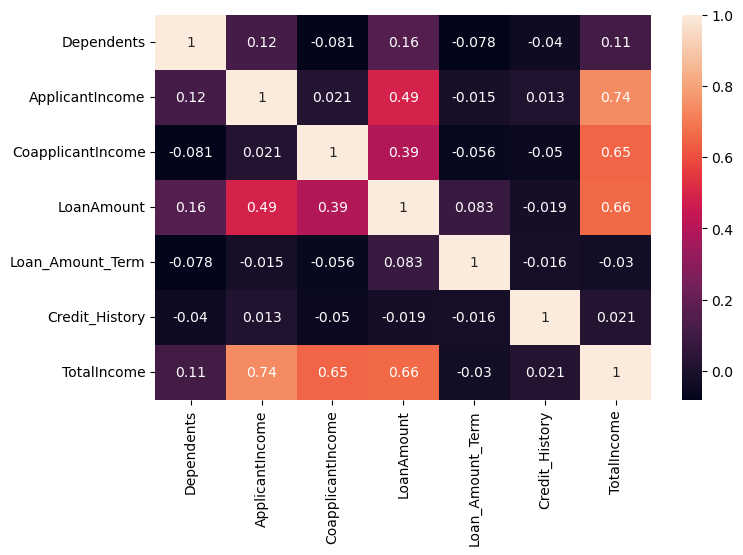

In [25]:
plt.figure(figsize=(8,5))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()

# DROPPING UNNECESSARY COLUMNS:-
1) LoanAmount, CoaaplicantIncome, ApplicantIncome, TotalIncome is dropped because their correlation is high which is    undesirable because these variables are independent variables.
2) we will also drop Loan_ID from dataset because there is no use of it.

In [26]:
cols = ['LoanAmount','CoapplicantIncome','ApplicantIncome','TotalIncome','Loan_ID']
data = data.drop(columns=cols, axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5.886104,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,5.886104,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,5.886104,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,5.886104,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,5.886104,1.0,Urban,Y


# LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
cols2 = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for col in cols2:
    data[col] = le.fit_transform(data[col])

In [28]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5.886104,1.0,2,1
1,1,1,1.0,0,0,5.886104,1.0,0,0
2,1,1,0.0,0,1,5.886104,1.0,2,1
3,1,1,0.0,1,0,5.886104,1.0,2,1
4,1,0,0.0,0,0,5.886104,1.0,2,1


# TRAIN - TEST - SPLIT

In [29]:
# specify input and output attributes
X = data.drop(columns=['Loan_Status'], axis=1)
Y = data['Loan_Status']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=34)

# MODEL TRAINING AND TESTING

In [31]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model,x,y):
    model.fit(x_train,y_train)
    print("Acuraccy is:", np.round(model.score(x_test,y_test)*100,2))
    # cross validation - it is used for better validation of model
    # eg: cv-5, train -4, test-1
    score=cross_val_score(model,x,y,cv=5)
    print("Cross validation accuracy is:", np.round(np.mean(score)*100,2))

In [32]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
classify(model1,X,Y)

Acuraccy is: 81.17
Cross validation accuracy is: 80.95


In [33]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
classify(model2,X,Y)

Acuraccy is: 70.13
Cross validation accuracy is: 73.13


In [34]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model3=RandomForestClassifier()
classify(model3,X,Y)

Acuraccy is: 79.22
Cross validation accuracy is: 77.2


In [35]:
model4=ExtraTreesClassifier()
classify(model4,X,Y)

Acuraccy is: 72.73
Cross validation accuracy is: 75.41


In [36]:
from sklearn import svm
model5 = svm.SVC(kernel='linear')
classify(model5,X,Y)

Acuraccy is: 81.17
Cross validation accuracy is: 80.95


In [37]:
from sklearn.naive_bayes import GaussianNB
model6 = GaussianNB()
classify(model6,X,Y)

Acuraccy is: 80.52
Cross validation accuracy is: 80.46


# HYPERPARAMETER TUNING

In [38]:
# Using random parameter selection:-

model7 = RandomForestClassifier(n_estimators=150,min_samples_split=25,max_depth=7,max_features=1)
classify(model7,X,Y)

Acuraccy is: 81.82
Cross validation accuracy is: 80.94


In [39]:
# Using GridsearchCV:-

# Number of trees in random forest
n_estimators = [80,100,150,175]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# maximum number of levels in tree
max_depth = [5,7,8]

# Number of samples
max_samples = [0.5,0.75,1.0]

# Minimum samples split
min_samples_split = [20,25,30]

# Minimum sample leaf
min_samples_leaf = [3,4]

In [40]:
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
             'max_samples': max_samples,
             'min_samples_split':min_samples_split,
             'min_samples_leaf':min_samples_leaf}

In [41]:
model8 = RandomForestClassifier()

In [42]:
from sklearn.model_selection import GridSearchCV

model8_grid = GridSearchCV(estimator=model8,
                          param_grid = param_grid,
                          cv = 5,
                          verbose = 2,
                          n_jobs = -1)

In [43]:
model8_grid.fit(X,Y)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 8],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [20, 25, 30],
                         'n_estimators': [80, 100, 150, 175]},
             verbose=2)

In [44]:
model8_grid.best_params_

{'max_depth': 7,
 'max_features': 0.2,
 'max_samples': 1.0,
 'min_samples_leaf': 3,
 'min_samples_split': 25,
 'n_estimators': 80}

In [55]:
print("The accuracy of model8_grid is",np.round(model8_grid.best_score_*100,2),"%")

The accuracy of model8_grid is 81.11 %


# PREDICTING OUTPUT

In [56]:
# IN OUTPUT IT SHOWS array([1]) which means the loan will be approved for the predicted sample 
# with a cross validation accuracy of around 81 percent.

pred = np.array([1,0,3,1,0,5.886104,1,2])
pred = pred.reshape(1,-1)

if model8_grid.predict(pred) == 1:
    print("Loan will be approved")
else:
    print("Loan will not be approved")

Loan will be approved


# CONFUSION MATRIX
A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is a means of displaying number of accurate and inaccurate instances from the model’s predictions. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.

The matrix displays, the number of instances produced by the model on the test data.

true positives (TP): occurs when the model accurately predicts a positive data point.
true negatives (TN): occurs when the model accurately predicts a negative data point.
false positives (FP): occurs when the model predicts a positive data point incorrectly.
and false negatives (FN): occurs when the model predicts a negative data point incorrectly.

In [47]:
model = RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[ 20,  25],
       [  6, 103]], dtype=int64)

<Axes: >

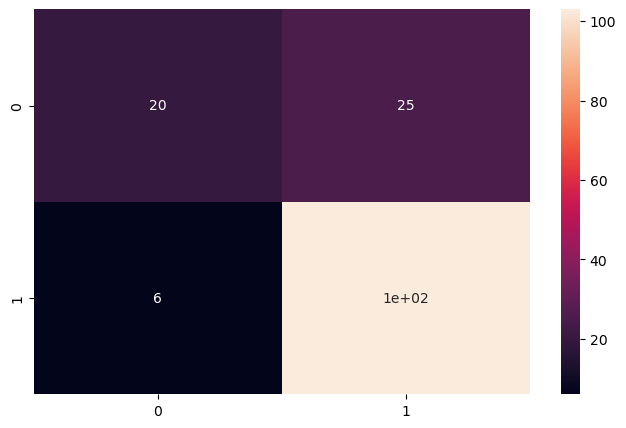

In [49]:
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True)